In [1]:
import pandas as pd
import statistics
import scipy.stats as stats

dataframe = pd.read_csv('../measurments/measurments.csv')

dataframe


,id,design_pattern_instance,change_type,bugs,vulnerabilities,debt,debt_ratio,code_smells,Duplication,LOC,statements,classes,functions,cyclomatic,cognitive,with_pattern
0,1,singleton,implementation,0,0,9.0,0.9,3,0.0,32,32,3,6,10,4,0
1,2,singleton,implementation (extracted from a repo),0,0,0.0,0.0,0,45.7,31,29,1,4,7,5,0
2,3,observer,implementation,0,0,13.0,2.0,5,0.0,22,22,2,5,8,3,0
3,4,observer,implementation (extracted from a repo),0,0,0.0,0.0,0,0.0,59,57,3,7,13,7,0
4,5,factory,implementation,1,0,0.0,0.0,0,0.0,13,12,0,3,4,2,0
5,6,factory method,implementation (extracted from a repo),0,0,5.0,0.3,1,70.9,62,57,2,6,13,13,0
6,7,template,implementation,0,0,20.0,5.6,2,0.0,12,12,0,2,2,0,0
7,8,iterator,implementation,0,0,0.0,0.0,0,0.0,18,18,1,3,4,1,0
8,9,adapter,implementation (extracted from a repo),0,0,0.0,0.0,0,0.0,19,18,1,4,7,6,0
9,1,singleton,implementation,0,0,4.0,0.3,2,0.0,40,40,3,7,13,6,1


In [18]:
data = {}

metrics = [
'bugs',
 'vulnerabilities',
 'debt',
 'debt_ratio',
 'code_smells',
 'Duplication',
 'LOC',
 'statements',
 'classes',
 'functions',
 'cyclomatic',
 'cognitive',
]
for metric in metrics :

    with_pattern = dataframe [ dataframe.with_pattern ==1]
    without_pattern = dataframe [ dataframe.with_pattern ==0]
        
    data[metric] = [stats.mannwhitneyu(with_pattern[metric].tolist() , without_pattern[metric].tolist()).pvalue/2]

print (pd.DataFrame(data))

   bugs  vulnerabilities      debt  debt_ratio  code_smells  Duplication  \
0   0.5              0.5  0.481179    0.352627      0.28535     0.475831   

       LOC  statements  classes  functions  cyclomatic  cognitive  
0  0.03506    0.050818   0.0092   0.004643    0.041176   0.394526  


In [19]:

data1 = list(data.values())
values = []
for x in data1 :
    values+= x

values

[0.5,
 0.5,
 0.48117850397028855,
 0.35262700285919435,
 0.28534990079161404,
 0.4758306049301797,
 0.03506044288801104,
 0.050818151288025366,
 0.009199618710859761,
 0.004642914387054854,
 0.041176107526403334,
 0.39452577819566226]

In [20]:
keys = list(data.keys())

keys

['bugs',
 'vulnerabilities',
 'debt',
 'debt_ratio',
 'code_smells',
 'Duplication',
 'LOC',
 'statements',
 'classes',
 'functions',
 'cyclomatic',
 'cognitive']

Text(0, 0.5, 'p-value')

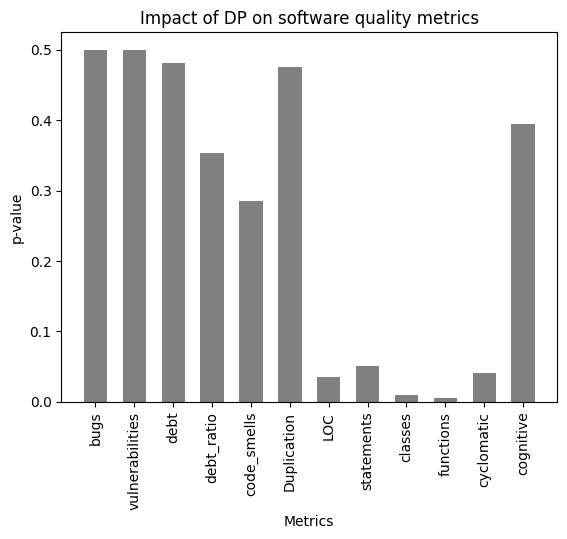

In [23]:
from matplotlib import pyplot 

pyplot.bar(range(len(values)), values, width = 0.6, color = 'gray')

metrics = keys

pyplot.xticks(range(len(values)), metrics ,
rotation = 90)
pyplot.title('Impact of DP on software quality metrics')
pyplot.xlabel ('Metrics')
pyplot.ylabel('p-value')